In [68]:
# ==============================================
# International Student Recruitment Analytics
# Dataset: Global Student Migration & Higher Education Trends
# Prepared by: Rushita Alfene
# ==============================================

# Notebook settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# ==============================================
# 1. LOAD DATASET
# ==============================================
df = pd.read_csv('global_student_migration.csv')
dfCleaned = pd.read_csv('global_student_migration_New_cleaned.csv')
print("Dataset shape:", df.shape)
df.head(10)
dfCleaned.head(10)

Dataset shape: (5000, 20)


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score,placement_success,placement_rate
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021-01-01,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8,1,0.509677
1,S00002,United Kingdom,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023-01-01,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9,1,0.486974
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019-01-01,No,Scholarship,2020,Not Placed,Unknown,NaN,0,2.72,F1,Blue Card,NaN,0.0,0,0.525490
3,S00004,United Arab Emirates,United Kingdom,Birmingham,University of Birmingham,Data Science,Social Sciences,2021-01-01,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0,1,0.496674
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020-01-01,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2,1,0.511156
5,S00006,United Arab Emirates,South Africa,Pretoria,University of Pretoria,Mechanical Engineering,Engineering,2022-01-01,Yes,Job Opportunities,2023,Not Placed,Unknown,NaN,0,2.69,J1,Blue Card,TOEFL,7.4,0,0.496674
6,S00007,United Arab Emirates,United Kingdom,Edinburgh,University of Edinburgh,Architecture,Law,2019-01-01,Yes,Quality of Life,2021,Not Placed,Unknown,NaN,0,2.99,Study Permit,Blue Card,Duolingo,5.6,0,0.496674
7,S00008,United Arab Emirates,United Kingdom,Cambridge,University of Cambridge,Finance,Law,2023-01-01,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4,1,0.496674
8,S00009,India,Russia,Moscow,Higher School of Economics,Economics,Business,2021-01-01,Yes,Higher Ranking,2024,Placed,Russia,McKinsey,118106,3.20,Student Visa,Work Permit,NaN,0.0,1,0.491968
9,S00010,Germany,India,Mumbai,IIT Bombay,Data Science,Business,2023-01-01,No,Quality of Life,2025,Placed,India,Microsoft,78324,2.65,J1,Post-Study Visa,NaN,0.0,1,0.516008


In [69]:
# ==============================================
# 2. DATA CLEANING PROCESS
# ==============================================
# Remove duplicates
df = df.drop_duplicates()

# Standardize country names
country_replace = {
    'USA': 'United States',
    'US': 'United States',
    'U.S.A.': 'United States',
    'UK':'United Kingdom',
    'UAE':'United Arab Emirates'
    
}

df['origin_country'] = df['origin_country'].replace(country_replace)
df['destination_country'] = df['destination_country'].replace(country_replace)

# Standardize origin and destination country names
df['origin_country'] = df['origin_country'].str.strip().str.title()
df['destination_country'] = df['destination_country'].str.strip().str.title()
df.head(10)


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,United Kingdom,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,United Arab Emirates,United Kingdom,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
5,S00006,United Arab Emirates,South Africa,Pretoria,University of Pretoria,Mechanical Engineering,Engineering,2022,Yes,Job Opportunities,2023,Not Placed,NaN,NaN,0,2.69,J1,Blue Card,TOEFL,7.4
6,S00007,United Arab Emirates,United Kingdom,Edinburgh,University of Edinburgh,Architecture,Law,2019,Yes,Quality of Life,2021,Not Placed,NaN,NaN,0,2.99,Study Permit,Blue Card,Duolingo,5.6
7,S00008,United Arab Emirates,United Kingdom,Cambridge,University of Cambridge,Finance,Law,2023,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4
8,S00009,India,Russia,Moscow,Higher School of Economics,Economics,Business,2021,Yes,Higher Ranking,2024,Placed,Russia,McKinsey,118106,3.20,Student Visa,Work Permit,NaN,0.0
9,S00010,Germany,India,Mumbai,IIT Bombay,Data Science,Business,2023,No,Quality of Life,2025,Placed,India,Microsoft,78324,2.65,J1,Post-Study Visa,NaN,0.0


In [70]:
# Fill missing values
df['test_score'] = df['test_score'].fillna(0)
df['placement_country'] = df['placement_country'].fillna('Unknown')
# Display cleaned sample
df.head(10)

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,United Kingdom,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,Unknown,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,United Arab Emirates,United Kingdom,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
5,S00006,United Arab Emirates,South Africa,Pretoria,University of Pretoria,Mechanical Engineering,Engineering,2022,Yes,Job Opportunities,2023,Not Placed,Unknown,NaN,0,2.69,J1,Blue Card,TOEFL,7.4
6,S00007,United Arab Emirates,United Kingdom,Edinburgh,University of Edinburgh,Architecture,Law,2019,Yes,Quality of Life,2021,Not Placed,Unknown,NaN,0,2.99,Study Permit,Blue Card,Duolingo,5.6
7,S00008,United Arab Emirates,United Kingdom,Cambridge,University of Cambridge,Finance,Law,2023,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4
8,S00009,India,Russia,Moscow,Higher School of Economics,Economics,Business,2021,Yes,Higher Ranking,2024,Placed,Russia,McKinsey,118106,3.20,Student Visa,Work Permit,NaN,0.0
9,S00010,Germany,India,Mumbai,IIT Bombay,Data Science,Business,2023,No,Quality of Life,2025,Placed,India,Microsoft,78324,2.65,J1,Post-Study Visa,NaN,0.0


In [ ]:
# Convert year_of_enrollment to datetime format
df['year_of_enrollment'] = pd.to_datetime(df['year_of_enrollment'], format='%Y', errors='coerce')

In [71]:
# ==============================================
# 3. Save Cleaned Dataset
# ==============================================
#Save the new cleaned file to be used
df.to_csv('global_student_migration_New_cleaned.csv', index=False)
print("Cleaned data saved to: global_student_migration_new_cleaned.csv")
dfCleaned = pd.read_csv('global_student_migration_New_cleaned.csv')

dfCleaned.head(10)

Cleaned data saved to: global_student_migration_new_cleaned.csv


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,United Kingdom,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,Unknown,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,United Arab Emirates,United Kingdom,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
5,S00006,United Arab Emirates,South Africa,Pretoria,University of Pretoria,Mechanical Engineering,Engineering,2022,Yes,Job Opportunities,2023,Not Placed,Unknown,NaN,0,2.69,J1,Blue Card,TOEFL,7.4
6,S00007,United Arab Emirates,United Kingdom,Edinburgh,University of Edinburgh,Architecture,Law,2019,Yes,Quality of Life,2021,Not Placed,Unknown,NaN,0,2.99,Study Permit,Blue Card,Duolingo,5.6
7,S00008,United Arab Emirates,United Kingdom,Cambridge,University of Cambridge,Finance,Law,2023,No,Job Opportunities,2024,Placed,UK,Facebook,98247,3.53,Student Visa,Work Permit,IELTS,5.4
8,S00009,India,Russia,Moscow,Higher School of Economics,Economics,Business,2021,Yes,Higher Ranking,2024,Placed,Russia,McKinsey,118106,3.20,Student Visa,Work Permit,NaN,0.0
9,S00010,Germany,India,Mumbai,IIT Bombay,Data Science,Business,2023,No,Quality of Life,2025,Placed,India,Microsoft,78324,2.65,J1,Post-Study Visa,NaN,0.0


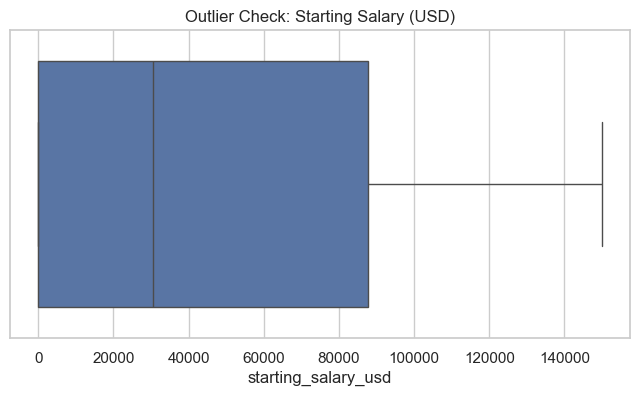

In [72]:
# ==============================================
# 4 . QUALITY ASSURANCE
# ==============================================
# Outlier detection: Boxplot for salary
dfCleaned['starting_salary_usd'].describe()  # Use this to present summary stats

# Optional: Plot salary boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['starting_salary_usd'])
plt.title('Outlier Check: Starting Salary (USD)')
plt.show()

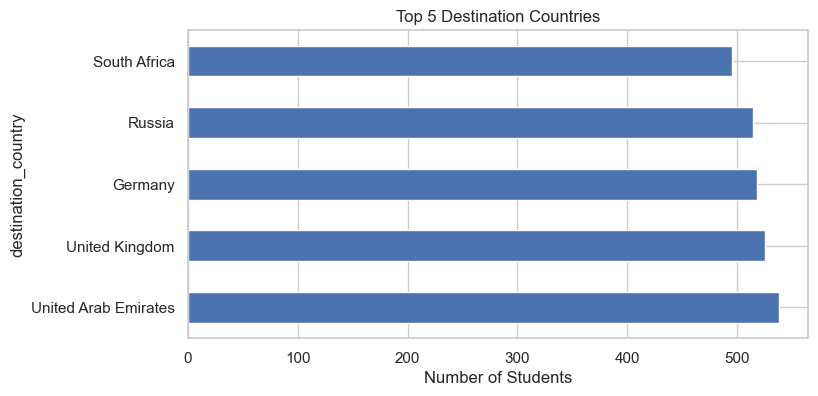

In [73]:
# 5. Destination Country Popularity
# ==============================================

# Most popular destination countries - Most common countries for study abroad.
top_dest = dfCleaned['destination_country'].value_counts().head(5)
top_dest.plot(kind='barh', figsize=(8, 4), title='Top 5 Destination Countries')
plt.xlabel('Number of Students')
plt.show()

In [74]:
# ==============================================
# 6. FEATURE ENGINEERING
# ==============================================
# Goal: Create new useful columns for ML.

# Binary label: 1 = Placed, 0 = Not Placed
dfCleaned['placement_success'] = dfCleaned['placement_status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Placement rate by origin_country
placement_rate = dfCleaned.groupby('origin_country')['placement_success'].mean().reset_index(name='placement_rate')

# Top 5 countries with highest placement rates
placement_rate.sort_values(by='placement_rate', ascending=False).head()

,origin_country,placement_rate
4,Ireland,0.525490
0,Canada,0.516441
2,Germany,0.516008
6,South Africa,0.511156
1,Finland,0.509677


In [75]:
# ==============================================
# 7. TRANSFORMATIONS FOR ML PREP
# ==============================================
#Normalize and encode features.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize salary
scaler = MinMaxScaler()
dfCleaned['salary_scaled'] = scaler.fit_transform(dfCleaned[['starting_salary_usd']])

# Encode visa_status
le = LabelEncoder()
dfCleaned['visa_encoded'] = le.fit_transform(df['visa_status'].astype(str))

# Check transformed features
dfCleaned[['starting_salary_usd', 'salary_scaled', 'visa_status', 'visa_encoded']].head()

,starting_salary_usd,salary_scaled,visa_status,visa_encoded
0,36416,0.242883,Tier 4,5
1,32956,0.219806,Study Permit,4
2,0,0.000000,F1,0
3,50892,0.339434,Schengen Student Visa,2
4,54790,0.365432,Schengen Student Visa,2


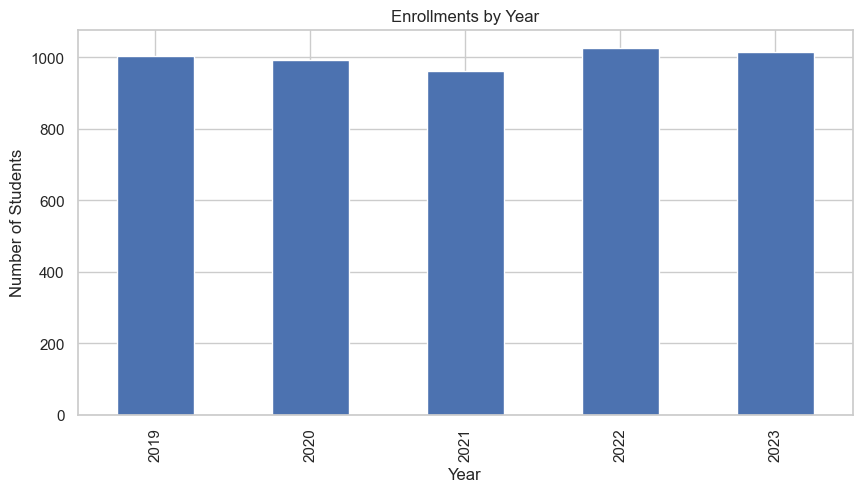

In [78]:
# 8. Data Integrity
# ==============================================

#Goal: Group data by year to show enrollment trends.
# Convert year_of_enrollment to datetime format
dfCleaned['year_of_enrollment'] = pd.to_datetime(df['year_of_enrollment'], format='%Y', errors='coerce')

# Group by year
enrollments_by_year = dfCleaned.groupby(dfCleaned['year_of_enrollment'].dt.year).size()

# Drop rows where conversion failed (optional but recommended)
dfCleaned = dfCleaned.dropna(subset=['year_of_enrollment'])

# Group by year
enrollments_by_year = dfCleaned.groupby(dfCleaned['year_of_enrollment'].dt.year).size()

# Plot
enrollments_by_year.plot(kind='bar', figsize=(10, 5), title='Enrollments by Year')
plt.ylabel('Number of Students')
plt.xlabel('Year')
plt.show()